In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium.plugins
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
daniela_path = 'drive/MyDrive/Class/CS209b/CS209b_Final_Project'
elie_path = "drive/MyDrive/CS209b_Final_Project"

path = elie_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Creating Outcome Variables

In [3]:
y = pd.read_csv(path + '/outcome_data/election2022_vF.csv')#[['District', 'DEM', 'GEOID']]

In [4]:
metadata = pd.read_csv(path + '/location_data/final_locations.csv')
metadata.head()

,ID,ZIP,Latitude,Longitude,City,State,County,Zip,Country,Congressional District
0,0,4401,44.848517,-68.850405,Bangor,ME,Penobscot County,4401.0,US,ME2
1,1,68050,41.314461,-96.823281,Prague,NE,Saunders County,68050.0,US,NE2
2,2,58579,47.158600,-100.783470,Wilton,ND,McLean County,58579.0,US,ND0
3,3,99402,46.339330,-117.048210,Asotin,WA,Asotin County,99402.0,US,WA5
4,4,32352,30.657410,-84.691030,Mount Pleasant,FL,Gadsden County,32352.0,US,FL2


In [5]:
metadata = metadata.drop(metadata[metadata['ZIP'] == 99999].index)
metadata['Congressional District'] = metadata['Congressional District'].apply(lambda x: x[:2] + "-" + x[2:])

In [6]:
metadata['Congressional District']

0       ME-2
1       NE-2
2       ND-0
3       WA-5
4       FL-2
        ... 
9995    WI-8
9996    WI-1
9997    MO-4
9998    CO-2
9999    ID-2
Name: Congressional District, Length: 9996, dtype: object

In [7]:
y_full = metadata[['ID', 'Congressional District', 'Latitude', 'Longitude']].merge(y[['District', 'DEM']], left_on="Congressional District", right_on="District", how='right')

In [8]:
y_full = y_full[['ID', 'DEM', 'Latitude', 'Longitude']]

In [15]:
for i in range(10000,14000):
    new_row = {'ID': int(i), 'DEM': 1, 'Latitude': 0, 'Longitude': 0}
    y_full = y_full.append(new_row, ignore_index = True)

In [20]:
y_full

,ID,DEM,Latitude,Longitude
0,338.0,0,31.129427,-87.096126
1,347.0,0,31.090730,-88.228060
2,960.0,0,30.666959,-88.226989
3,1268.0,0,30.509877,-88.173001
4,1767.0,0,30.509877,-88.173001
...,...,...,...,...
13653,13995.0,1,0.000000,0.000000
13654,13996.0,1,0.000000,0.000000
13655,13997.0,1,0.000000,0.000000
13656,13998.0,1,0.000000,0.000000


In [21]:
value_counts = y_full['DEM'].value_counts()
value_counts

0    6927
1    6731
Name: DEM, dtype: int64

Text(0, 0.5, 'Number of Districts')

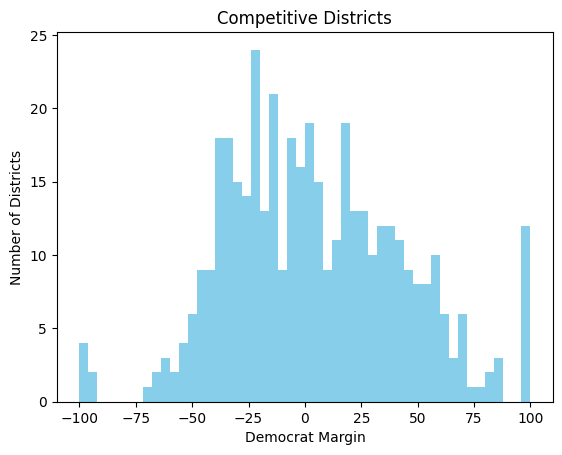

In [22]:
plt.hist(y.D_2020 - y.R_2020, bins=50, color="skyblue")
plt.title("Competitive Districts")
plt.xlabel("Democrat Margin")
plt.ylabel("Number of Districts")

In [23]:
y_full.to_csv(path + "/outcome_data/final_outcome.csv")

## Evaluating

In [ ]:
y_full = pd.read_csv(path + '/outcome_data/1000img_outcome.csv')

In [ ]:
#Mapping the plotted points
this_map = folium.Map(tiles='CartoDB positron')

def plotDot(point, tag="daycare", lat=0, lon=0):
    col = 'red'
    if (point['DEM'] != 0): 
      col = 'blue'
    folium.CircleMarker(location=[point['Latitude'], point['Longitude']],
                            radius=2,
                            weight=5,
                            color=col).add_to(this_map)

print("PLOTTING LINES")

y_full.apply(plotDot, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save(path + '/outcome_data/sampled_images_1000.html')

PLOTTING LINES
